# 1. Imports

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot            as plt
import seaborn                      as sns
from sklearn.preprocessing          import StandardScaler
from sklearn                        import preprocessing, linear_model
from sklearn.metrics                import r2_score, mean_squared_error
from sklearn.model_selection        import train_test_split, cross_val_score,GridSearchCV

#Model
from sklearn.ensemble               import RandomForestRegressor

# 2. Load Data

In [2]:
#Load the file generated from EDA.
file = 'Asteroid_EDA_Clean.csv'
df = pd.read_csv(file, sep=',', index_col=0)

In [3]:
#Verify that the data loaded correctly.
df.head().T

,0,1,2,3,4
semi-major_axis(au),2.76917,2.77247,2.66915,2.36142,2.57425
eccentricity,0.076009,0.230337,0.256942,0.0887215,0.191095
x-y_inclination(deg),10.5941,34.8362,12.9889,7.14177,5.36699
longitude_asc_node,80.3055,173.08,169.853,103.811,141.577
argument_perihelion,73.5977,310.049,248.139,150.729,358.688
perihelion_dist(au),2.55868,2.13386,1.98333,2.15191,2.08232
aphelion_dist(au),2.97965,3.41107,3.35497,2.57093,3.06617
data_arc(d),8822,72318,72684,24288,63507
n_obs_used,1002,8490,7104,9325,2916
diameter,939.4,545,246.596,525.4,106.699


# 3. Feature Engineering

In [4]:
df['log'] = np.log(df['diameter'])

# 4. Random Forest Regressor

In [5]:
#Split data into features and target.
y = df['log']
X = df.drop(columns=['diameter','log','class'])

#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Standarize the features

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#Create the model.
rf = RandomForestRegressor(n_estimators = 100)

#Train the model.
rf.fit(X_train, y_train)

#Use the model to make predictions.
rf_pred = rf.predict(X_test)

#Evaluate the model.
rf_score = rf.score(X_train, y_train)
rf_score_test = rf.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print('Train Score:',rf_score)
print('Test Score:', rf_score_test)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)

Train Score: 0.9786435056924974
Test Score: 0.8491544115796976
MSE: 0.06186787487079966
RMSE: 0.24873253681575247


# 5. Visualize Actual Diameter Against Predicted Diameter

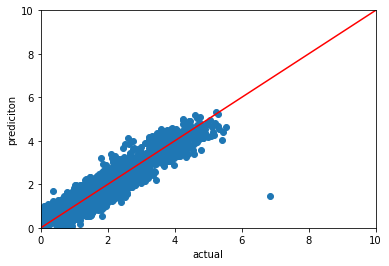

In [6]:
plt.scatter(y_test,rf_pred)
plt.plot([0,10],[0,10],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 10) 
plt.ylim(0, 10) 
plt.show()

# 6. Feature Importance

12


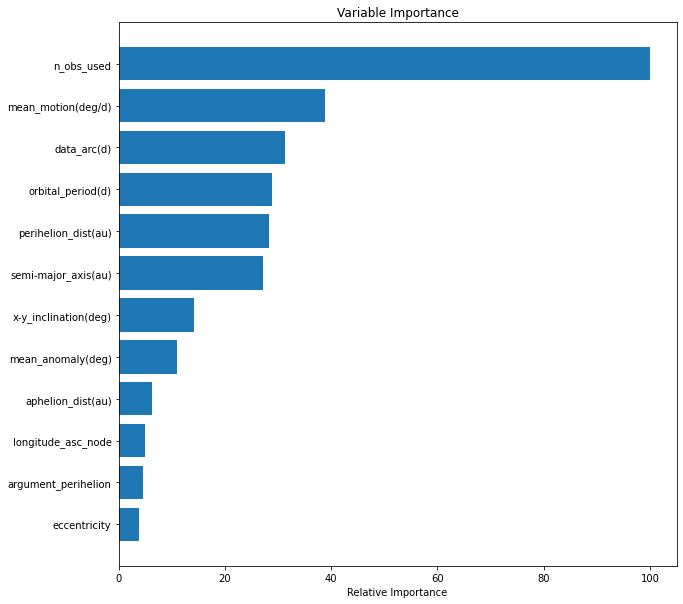

In [7]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()